# Project Modul2 : Data Analytic
## Database : Sakila (Focused on Film)
### By : Risdan Kristori

# Context

Sebuah toko yang menyediakan layanan sewa DVD ingin mengetahui secara umum gambaran bisnis yang telah berjalan dengan fokus utamanya yaitu jenis film yang disewakan toko tersebut. Pemilik toko ingin mendapatkan insight bagaimana meningkatkan kepuasan pelanggan dan menaikkan keuntungan toko dengan cara menyediakan jenis film yang tepat pada consumer yang tepat.

## Database Information 

Sumber database : https://downloads.mysql.com/docs/sakila-db.zip

Database ini memiliki tabel-tabel berikut:
- actor : berisi informasi mengenai aktor dalam film
- address : berisi informasi alamat dari konsumen, staff dan toko
- category : berisi kategori film
- city : berisi daftar kota dan negaranya sesuai dengan foreign key pada tabel address
- customer : berisi semua informasi mengenai konsumen
- film : berisi daftar film yang tersimpan di dalam toko
- film_actor : berisi informasi mengenai film dan actornya
- film_category : berisi informasi mengenai film dan jenis kategorinya
- film_text : berisi informasi mengenai film_id, judul dan deskripsi film
- inventory : berisi informasi mengenai salinan film dari setiap toko
- languange : berisi bahasa-bahasa yang terdapat dalam film
- payment : berisi informasi pembayaran dari konsumen
- rental : berisi informasi mengenai sewa (siapa yang menyewa, waktu sewa dan waktu pengembalian)
- staff : berisi informasi mengenai staff
- store : berisi informasi manajer dan alamat toko
- actor_info : berisi daftar aktor dan film yang diperankan
- customer_list : berisi daftar informasi konsumen
- film_list : berisi daftar film dengan deksripsi dan aktornya
- nicer_but_slower_film_list : berisi daftar film dengan deksripsi dan aktornya
- sales_by_film_category : berisi daftar penjualan berdasarkan ketegori film
- sales_by_store : berisi daftar total penjualan berdasarkan toko
- staff_list : berisi daftar staff yang ada pada toko

## ERD Database Sakila 

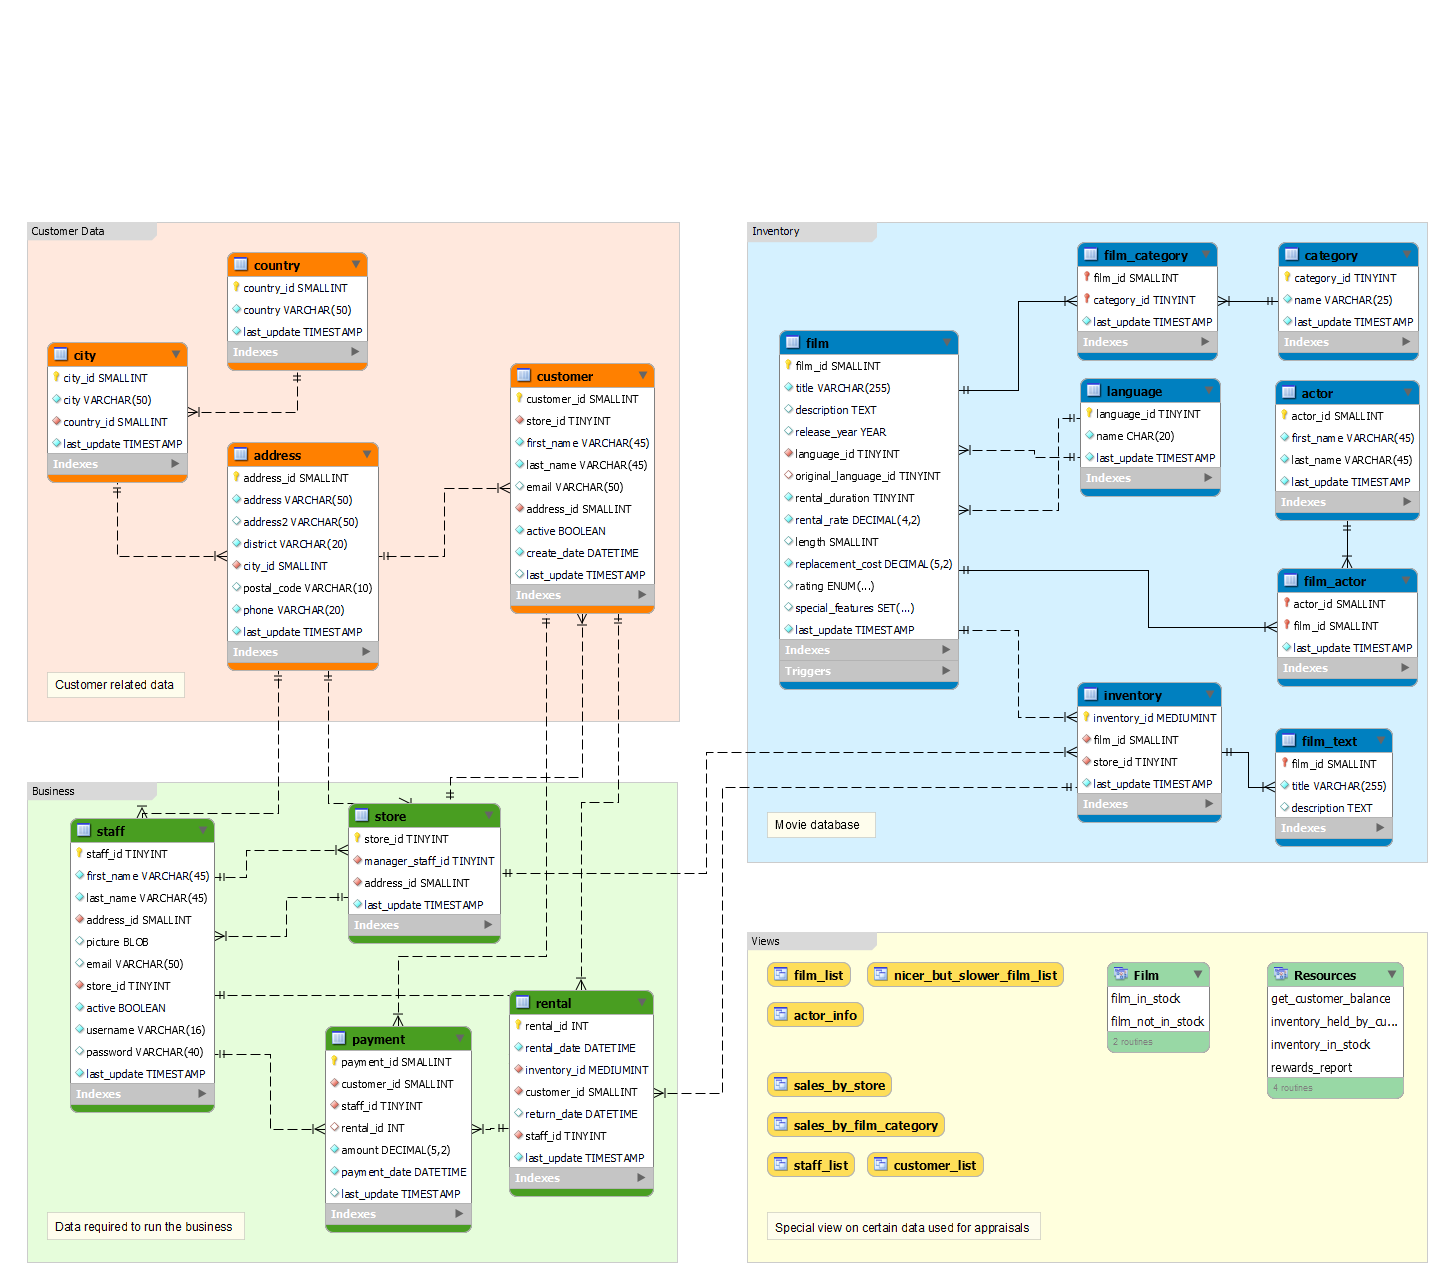

# Import Libraries and Data

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector as sqlcon
%matplotlib inline

In [2]:
# Membuat koneksi ke database sakila

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '*********',
    database = 'sakila'
)

Berikut ini adalah fungsi untuk mengeksekusi sql query melalui jupyter notebook. Hasil outputnya adalah dalam bentuk dataframe yang akan digunakan untuk melakukan analisis data.

In [3]:
curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## Data Detail

Data yang akan digunakan untuk analisis diambil dari tabel-tabel yang memiliki hubungan dengan film. Terdapat 2 dataframe yang akan digunakan yaitu data utama: film dan dan data pendukung: actor. Film berisi data yang berhubungan dengan film yang disewakan sedangkan actor berisi data mengenai film dan aktor yang memerankan film tersebut.

Berikut merupakan data film yang diambil dari database sakila.

Dalam query SQL pertama-tama adalah membuat `Common Table Expression (CTE)` tabel sales_by_film_id yang diambil dari tabel `payment`, `rental`, `inventory`, dan `film`. Data yang diambil disini adalah jumlah kolom *amount* (besar pembayaran sewa dan jumlah pembayaran) dari tabel `payment` yang dikumpulkan berdasarkan *film_id* dan kolom *film_id* yang diambil dari tabel `film`. Sedangkan tabel `rental` dan `inventory` digunakan untuk melakukan join antara tabel `payment` dan `film`.

Kemudian dilakukan left join antara tabel `film` dengan tabel `category`, `film_list`, `language` dan `CTE sales_by_film_id`. Kemudian data yang diambil untuk analisa adalah sebagai berikut.
- film_id dari tabel film
- title dari tabel film
- description dari tabel film
- release_year dari tabel film
- rental_duration dari tabel film
- rental_rate dari tabel film
- length dari tabel film
- replacement_cost dari tabel film
- rating dari tabel film
- special feature dari tabel film
- last_update dari tabel film
- category dari abel category
- name dari tabel language, dan 
- sales dari tabel sales_by_film_id
- rented dari tabel sales_by_film_id

Data berikut ini kemudian dibuat sebuah dataframe dengan nama **film** dengan index film_id.

In [4]:
film = sql_table(
'''
-- CTE for sales_by_film
with sales_by_film_id as (
	select sum(p.amount) as sales, count(p.amount) as rented, i.film_id from 
	payment p
	left join rental r on p.rental_id = r.rental_id
	left join inventory i on r.inventory_id = i.inventory_id
	left join film f on i.film_id = f.film_id
	group by film_id
)

-- Table for analysis (focus at film)
select f.film_id, f.title, f.description, f.release_year, f.rental_duration, f.rental_rate, f.length, f.replacement_cost, f.rating, 
	f.special_features, f.last_update, c.name as category, l.name as language, sf.sales, sf.rented
from film f
left join film_category fc on f.film_id = fc.film_id
left join category c on fc.category_id = c.category_id
left join film_list fl on f.film_id = fl.FID
left join language l on f.language_id = l.language_id
left join sales_by_film_id sf on f.film_id = sf.film_id; 
'''
)

film.set_index('film_id', inplace = True)
film.head(3)

,title,description,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,category,language,sales,rented
film_id,,,,,,,,,,,,,,
1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,6,0.99,86,20.99,PG,"{Deleted Scenes, Behind the Scenes}",2006-02-15 05:03:42,Documentary,English,36.77,23.0
2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,3,4.99,48,12.99,G,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42,Horror,English,52.93,7.0
3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,7,2.99,50,18.99,NC-17,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42,Documentary,English,37.88,12.0


Berikutnya adalah data actor yang diambil dari database sakila.

Data ini terdiri dari gabungan beberapa tabel di dalam database yaitu `film_actor`, `actor`, dan `film`. Data yang diambil adalah sebagai berikut.

- film_id dari tabel film_actor
- title dari tabel film
- first_name dari tabel actor
- last_name dari tabel actor

Kemudia data ini dimuat ke dalam dataframe pandas dengan nama **actor**

In [5]:
actor = sql_table(
'''
select fa.film_id, film.title, a.first_name, a.last_name 
from film_actor fa
left join actor a on fa.actor_id = a.actor_id
left join film on fa.film_id = film.film_id
'''
)

actor.head(5)

,film_id,title,first_name,last_name
0,1,ACADEMY DINOSAUR,PENELOPE,GUINESS
1,1,ACADEMY DINOSAUR,CHRISTIAN,GABLE
2,1,ACADEMY DINOSAUR,LUCILLE,TRACY
3,1,ACADEMY DINOSAUR,SANDRA,PECK
4,1,ACADEMY DINOSAUR,JOHNNY,CAGE


# Data Cleaning & Manipulation 

Sebelum melakukan analisis data, terlebih dahulu akan dilakukan pembersihan dan manipulasi data, tujuannya adalah agar data lebih mudah dianalisis dan informasi yang terkandung di dalamnya tidak terdapat bias. Pembersihan manipulasi data terdiri dari penanganan terhadap `missing data`, `outlier`, `format data yang tidak sesuai` dan `feature engineering`. Disini akan dilihat informasi data utama sebagai berikut.

In [6]:
film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 14 columns):
title               1000 non-null object
description         1000 non-null object
release_year        1000 non-null int64
rental_duration     1000 non-null int64
rental_rate         1000 non-null object
length              1000 non-null int64
replacement_cost    1000 non-null object
rating              1000 non-null object
special_features    1000 non-null object
last_update         1000 non-null datetime64[ns]
category            1000 non-null object
language            1000 non-null object
sales               958 non-null object
rented              958 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 117.2+ KB


### Analisis Komposisi Data

Dilihat dari komposisi data diatas, data terdiri dari 14 kolom dan 1000 data. Terdapat 4 tipe data yang ada di dalam dataframe yaitu *object, int, float dan datetime*.

Terdapat 2 kolom yang tidak memiliki lengkap 1000 data yaitu kolom `rented` dan `sales`, kemungkinannya adalah adanya *missing data* pada masing-masing kolom tersebut.

Selain itu pada kolom `replacement_cost`, `rental_rate` dan `sales` tipe data yang dimiliki adalah object, padahal seharusnya ketiga kolom tersebut memiliki tipe data numerik, sehingga perlunya dilakukan perbaikan tipe terhadap kolom data tersebut. Ada juga kolom `rented` yang seharusnya adalah tipe data integer, kolom ini juga akan diubah ke yang sebelumnya adalah float menjadi integer.


Pada data juga terdapat kolom `special_feature` yang memiliki tipe data *set* (dilihat dari kurung kurawal pada data), sehingga akan sulit untuk dilakukan analisa. Data ini kemudian akan kita ubah ke tipe string agar lebih mudah dalam memproses data.

In [7]:
actor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462 entries, 0 to 5461
Data columns (total 4 columns):
film_id       5462 non-null int64
title         5462 non-null object
first_name    5462 non-null object
last_name     5462 non-null object
dtypes: int64(1), object(3)
memory usage: 170.8+ KB


Pada dataframe actor terdapat 4 kolom yang berisi 5462 data. Dari keempat kolom terdapat data film_id yang bertipe data integer dan lainnya bertipe data objek. Dari informasi diatas terlihat bahwa dataframe ini tidak memiliki missing value dan tipe data yang ada telah sesuai.

### Handling Missing Value 

Sebelum dilakukan analisa data sebaiknya dilakukan perbaikan terhadap data yang masih memiliki *missing value*. Nilai *missing value* dapat dilihat dari fungsi berikut.

In [8]:
# Percentage missing value in main data

film.isnull().sum() * 100 / len(film)

title               0.0
description         0.0
release_year        0.0
rental_duration     0.0
rental_rate         0.0
length              0.0
replacement_cost    0.0
rating              0.0
special_features    0.0
last_update         0.0
category            0.0
language            0.0
sales               4.2
rented              4.2
dtype: float64

Terdapat dua kolom yang miliki *missing values* yaitu `rented` dan `sales`. 

Pada kolom `sales` data yang memiliki missing values sebanyak 42 data (4.2%) hal ini dikarenakan tidak adanya data nilai penyewaan pada film tersebut, oleh karena itu nilai missing value akan diganti dengan nol (0) yang menenjukan bahwa tidak adanya hasil sewa dari film tersebut.

Sama seperti kolom `sales`, kolom `rented` terdapat missing value karena tidak adanya data peminjam untuk film tersebut. Sehingga nilai missing value kita gantikan dengan nol (0).

In [9]:
# Mengganti nilai NaN pada kolom sales dan rented dengan nilai nol (0)
film['sales'].fillna(0, inplace=True)
film['rented'].fillna(0, inplace=True)

Setelah dilakukan perbaikan dicek kembali *missing value* pada masing-masing dataframe.

In [10]:
# Cek kembali missing values pada data utama
print('Missing Value in Film Dataframe')
print(film.isnull().sum())
print('\n')
print('Missing Value in Actor Dataframe')
print(actor.isnull().sum())

Missing Value in Film Dataframe
title               0
description         0
release_year        0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
special_features    0
last_update         0
category            0
language            0
sales               0
rented              0
dtype: int64


Missing Value in Actor Dataframe
film_id       0
title         0
first_name    0
last_name     0
dtype: int64


Setelah dilakukan penanganan terhadap *missing value* kemudian dicek kembali, dapat dilihat bahwa data film dan actor tidak lagi terdapat *missing value*. *Missing value* sebenarnya tidak tentang NaN atau data kosong saja, bisa saja missing value berisi nilai yang lain baik itu numerik (misal: 0 atau -1) ataupun string (misal: ? atau None), oleh karena di dalam analisa data kedepan jika diketemukan data unik yang tidak sesuai dengan konteks yang ada, bisa dilakukan review kembali untuk ditangani sebagai *missing value*.

### Handling Wrong Datatype

Sebelumnya telah dijelaskan ada beberapa data dari dataframe film yang memiliki format data yang tidak sesuai yaitu `rental_rate`, `replacement_cost`, `sales`, `special_features` dan `rented`. Sebelum data tersebut dianalisa baiknya dilakukan perbaikan dengan mengubah ke tipe yang sesuai terhadap data tersebut. 

In [11]:
# Mengubah tipe data ke numeric
film['rental_rate'] = pd.to_numeric(film['rental_rate'])
film['replacement_cost'] = pd.to_numeric(film['replacement_cost'])
film['sales'] = pd.to_numeric(film['sales'])

# Mengubah tipe data ke string
film['special_features'] = film['special_features'].apply(lambda x : str(x))

# Mengubah tipe data ke integer
film['rented'] = film['rented'].apply(lambda x : int(x))

In [12]:
# Cek kembali informasi data
film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 14 columns):
title               1000 non-null object
description         1000 non-null object
release_year        1000 non-null int64
rental_duration     1000 non-null int64
rental_rate         1000 non-null float64
length              1000 non-null int64
replacement_cost    1000 non-null float64
rating              1000 non-null object
special_features    1000 non-null object
last_update         1000 non-null datetime64[ns]
category            1000 non-null object
language            1000 non-null object
sales               1000 non-null float64
rented              1000 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 117.2+ KB


### New Feature: price_per_day 

Kolom `rental_rate` merupakan harga sewa yang harus dibayarkan untuk penyewaan dengan jumlah hari yang terdapat di kolom `rental_duration`. Nilai yang terdapat pada kolom `rental_duration` adalah berbeda-beda untuk setiap film, oleh karena itu dibuat kolom baru yaitu price_per_day yang merupakan harga sewa per hari untuk masing-masing film.

Adapun nilai price_per_day adalah nilai `rental_rate` dibagi dengan `rental_duration`.

In [13]:
film['price_per_day'] = film['rental_rate']/film['rental_duration']
film['price_per_day'] = round(pd.to_numeric(film['price_per_day']),2)

### New Feature : name and Data Duplicate

Pada dataframe actor terdapat dua kolom name yaitu first_name dan last_name, untuk memudahkan analisa kedua kolom ini akan digabung menjadi satu yaitu kolom name. Kolom name kemudian akan berisi nama lengkap dari setiap aktor yang ada di dalam film yang disewakan di toko.

In [14]:
actor['name'] = actor['first_name']+' '+actor['last_name']

In [15]:
actor.head(2)

,film_id,title,first_name,last_name,name
0,1,ACADEMY DINOSAUR,PENELOPE,GUINESS,PENELOPE GUINESS
1,1,ACADEMY DINOSAUR,CHRISTIAN,GABLE,CHRISTIAN GABLE


Kolom name yang baru menambahkan satu kolom pada dataframe actor. Dapat dilihat bahwa dengan adanya kolom name, kolom fist_name dan last_name tidak terlalu dibutuhkan karena memiliki isi yang sama, hal ini menunjukan adanya **data duplicate**. Oleh karena itu kolom first_name dan last_name akan dihapus dari dataframe actor.

In [16]:
actor.drop(['first_name','last_name'], axis = 1, inplace=True)
actor.head(2)

,film_id,title,name
0,1,ACADEMY DINOSAUR,PENELOPE GUINESS
1,1,ACADEMY DINOSAUR,CHRISTIAN GABLE


### Handling Outliner (Film)

Sebelum data yang ada kita analisa sebaiknya dilakukan dahulu pemeriksaan terhadap data outlier. Data outlier bisa didapatkan dengan beberapa teknik, salah satunya adalah dengan teknik visualisasi dengan menggunakan boxplot. Terdapat 6 kolom yang akan diperiksa dengan boxplot yaitu `rental_duration`, `rental_rate`, `length`, `rented`, `replacement_cost`dan `sales`. Masing-masing kolom tersebut adalah data numerik.

Text(0.5, 0, 'Dollar')

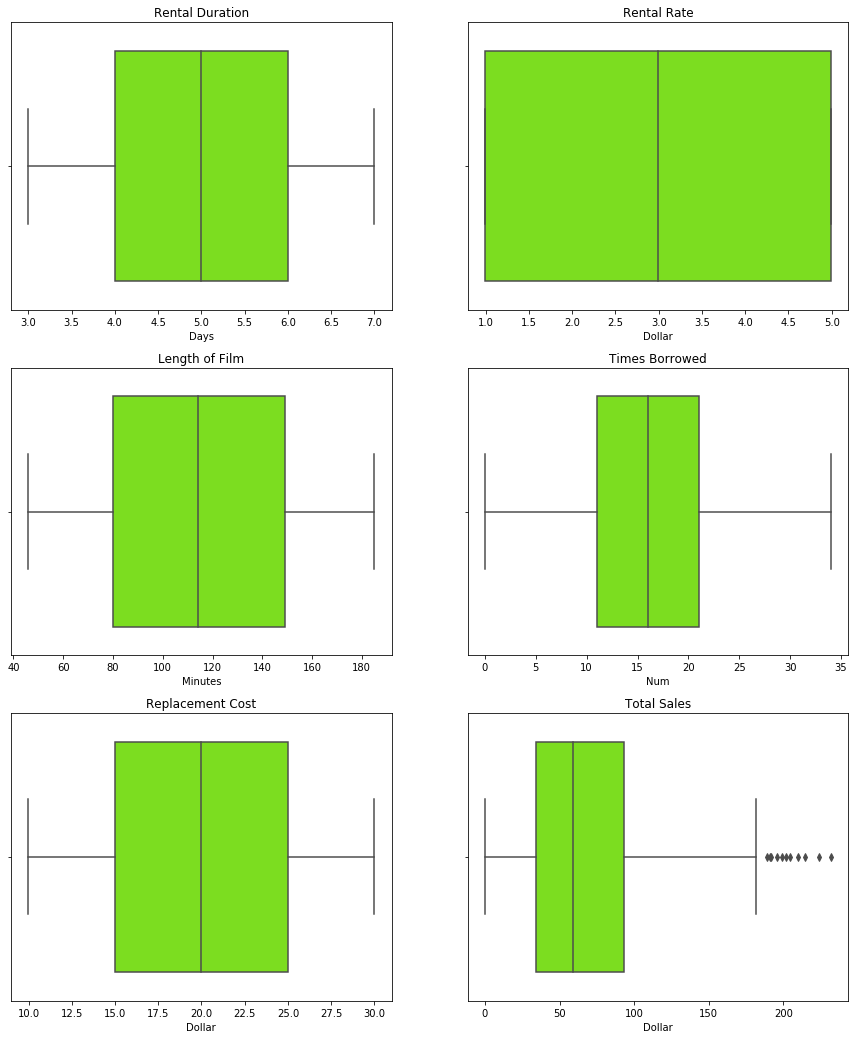

In [17]:
plt.figure(figsize=(15,18))
plt.subplot(3,2,1)
sns.boxplot(film['rental_duration'], color='lawngreen')
plt.title('Rental Duration')
plt.xlabel('Days')
plt.subplot(3,2,2)
sns.boxplot(film['rental_rate'], color='lawngreen')
plt.title('Rental Rate')
plt.xlabel('Dollar')
plt.subplot(3,2,3)
sns.boxplot(film['length'], color='lawngreen')
plt.title('Length of Film')
plt.xlabel('Minutes')
plt.subplot(3,2,4)
sns.boxplot(film['rented'], color='lawngreen')
plt.title('Times Borrowed')
plt.xlabel('Num')
plt.subplot(3,2,5)
sns.boxplot(film['replacement_cost'], color='lawngreen')
plt.title('Replacement Cost')
plt.xlabel('Dollar')
plt.subplot(3,2,6)
sns.boxplot(film['sales'], color='lawngreen')
plt.title('Total Sales')
plt.xlabel('Dollar')

In [18]:
Q1_sales = film['sales'].describe()['25%']
Q3_sales = film['sales'].describe()['75%']
IQR_sales = Q3_sales - Q1_sales

outlier_index = film[(film['sales'] < Q1_sales - (1.5 * IQR_sales)) | (film['sales']> Q3_sales + (1.5 *IQR_sales)) ].index
film.loc[outlier_index]

,title,description,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,category,language,sales,rented,price_per_day
film_id,,,,,,,,,,,,,,,
369,GOODFELLAS SALUTE,A Unbelieveable Tale of a Dog And a Explorer w...,2006,4,4.99,56,22.99,PG,{'Deleted Scenes'},2006-02-15 05:03:42,Sci-Fi,English,209.69,31,1.25
403,HARRY IDAHO,A Taut Yarn of a Technical Writer And a Femini...,2006,5,4.99,121,18.99,PG-13,"{'Commentaries', 'Deleted Scenes'}",2006-02-15 05:03:42,Drama,English,195.70,30,1.00
444,HUSTLER PARTY,A Emotional Reflection of a Sumo Wrestler And ...,2006,3,4.99,83,22.99,NC-17,"{'Trailers', 'Commentaries', 'Behind the Scenes'}",2006-02-15 05:03:42,Comedy,English,190.78,22,1.66
460,INNOCENT USUAL,A Beautiful Drama of a Pioneer And a Crocodile...,2006,3,4.99,178,26.99,PG-13,"{'Trailers', 'Deleted Scenes', 'Behind the Sce...",2006-02-15 05:03:42,Foreign,English,191.74,26,1.66
670,PELICAN COMFORTS,A Epic Documentary of a Boy And a Monkey who m...,2006,4,4.99,48,17.99,PG,"{'Commentaries', 'Deleted Scenes'}",2006-02-15 05:03:42,Documentary,English,188.74,26,1.25
764,SATURDAY LAMBS,A Thoughtful Reflection of a Mad Scientist And...,2006,3,4.99,150,28.99,G,"{'Commentaries', 'Deleted Scenes'}",2006-02-15 05:03:42,Sports,English,204.72,28,1.66
879,TELEGRAPH VOYAGE,A Fateful Yarn of a Husband And a Dog who must...,2006,3,4.99,148,20.99,PG,{'Commentaries'},2006-02-15 05:03:42,Music,English,231.73,27,1.66
893,TITANS JERK,A Unbelieveable Panorama of a Feminist And a S...,2006,4,4.99,91,11.99,PG,{'Behind the Scenes'},2006-02-15 05:03:42,Sci-Fi,English,201.71,29,1.25
897,TORQUE BOUND,A Emotional Display of a Crocodile And a Husba...,2006,3,4.99,179,27.99,G,"{'Trailers', 'Commentaries'}",2006-02-15 05:03:42,Drama,English,198.72,27,1.66


Dari hasil plot diatas dapat dilihat bahwa kolom `rental_duration`, `rental_rate`, `length`, `rented` dan `replacement_cost` tidak memiliki outlier, yang unik adalah data `rental_rate` dimana nilai minimal dan maksimal dari data sama dengan nilai quartil 1 dan quartil 3, menunjukan bahwa tidak banyak variasi di dalam data. Kolom yang memiliki nilai outlier dari plot diatas adalah kolom `sales`, ditunjukan pada boxplot terdapat titik-titik outlier diluar ujung box plot.

Kemudian ditampilkan data film yang memiliki nilai `sales` yang termasuk outlier. Film-film ini merupakan film dengan nilai hasil sewa yang tinggi. Dalam analisis data kedepannya nilai outlier pada `sales` ini tidak akan dihapus karena bukan merupakan data error tetapi memang dikarenakan tingginya minat konsumen pada film tersebut.

Jika kedepannya akan dibuat model algoritma Machine Learning untuk memprediksi nilai hasil sewa tersebut maka perlu dipertimbangkan untuk dilakukan scaling agar nilai outlier tersebut tidak merusak model sebenarnya.

### Handling Outlier (actor) 

Pada dataframe actor, tidak terdapat data numerik yang dianalis nilai outliernya, oleh karena itu untuk dataframe ini akan dikelompokan berdasarkan aktor yang memerankan film, sehingga didapatkan data performance yaitu berisi jumlah performance pada film yang dimainkan oleh masing-masing aktor. Kemudian data ini yang akan kita periksa nilai outliernya.

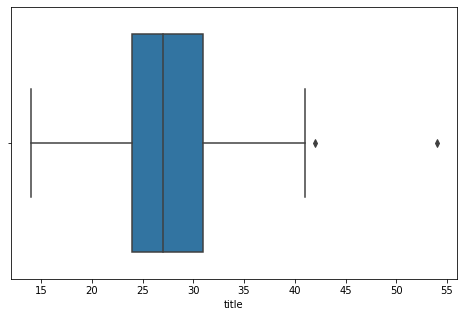

In [19]:
performance = actor.groupby('name').count()
plt.figure(figsize=(8,5))
sns.boxplot(performance['title'])

In [20]:
Q1_perf = performance['title'].describe()['25%']
Q3_perf = performance['title'].describe()['75%']
IQR_perf = Q3_perf - Q1_perf

outlier_index = performance[(performance['title'] < Q1_perf - (1.5 * IQR_perf)) | (performance['title']> Q3_perf + (1.5 *IQR_perf)) ].index
performance.loc[outlier_index]

,film_id,title
name,,
GINA DEGENERES,42,42
SUSAN DAVIS,54,54


Terdapat 2 nilai outlier yang dari nilai performance pada tabel aktor. Sama seperti sebelumnya nilai outlier ini tidak menunjukan nilai anomali atau error oleh karena itu tetap akan kita gunakan untuk menganalisis data.

## Review Data Summary 

Berikut ini kita lihat komposisi data yang disertai dengan missing values dan unique dari masing-masing kolom

In [21]:
listItem = []

for col in film.columns:
    listItem.append([col, film[col].dtype, len(film),film[col].isna().sum(),
        round((film[col].isna().sum()/len(film[col])) * 100,2), film[col].nunique()])

FilmDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique'],data=listItem)

FilmDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique
0,title,object,1000,0,0.0,1000
1,description,object,1000,0,0.0,1000
2,release_year,int64,1000,0,0.0,1
3,rental_duration,int64,1000,0,0.0,5
4,rental_rate,float64,1000,0,0.0,3
5,length,int64,1000,0,0.0,140
6,replacement_cost,float64,1000,0,0.0,21
7,rating,object,1000,0,0.0,5
8,special_features,object,1000,0,0.0,15
9,last_update,datetime64[ns],1000,0,0.0,1


Dari informasi tabel diatas dapat dilihat bahwa kolom `release_year`, `last_update` dan `language` pada tabel memiliki hanya 1 unique value yang menunjukan bahwa data tersebut sama untuk semua film. Karena itu kolom tersebut akan kita hapus karena tidak banyak informasi yang dapat digali melaluinya.

In [22]:
film.drop(['release_year','last_update','language'], axis=1, inplace=True)

In [23]:
listItem = []

for col in actor.columns:
    listItem.append([col, actor[col].dtype, len(actor),actor[col].isna().sum(),
        round((actor[col].isna().sum()/len(actor[col])) * 100,2), actor[col].nunique()])

ActorDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique'],data=listItem)

ActorDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique
0,film_id,int64,5462,0,0.0,997
1,title,object,5462,0,0.0,997
2,name,object,5462,0,0.0,199


Dari tabel diatas dapat dilihat bahwa jumlah film yang ada di data aktor tidak sama dengan data film (lebih banyak di film) hal ini menunjukan bahwa adanya film yang tidak diketahui aktornya (NaN). Diketahui juga bahwa total aktor yang memerankan film terdapat 199 orang.

Setelah semua data telah bersih kemudian dilanjutkan menganalisa data. Dalam menganalisa data akan digunakan visualisasi yang terdapat pada library python dikarenakan data yang adalah telah dimuat didalam bentuk dataframe yang terdapat di python. Data disini juga dibuat visualisasi dengan menggunakan Tablue Public yang dapat dilihat di alamat berikut.

Visualization Using Tablue: https://public.tableau.com/app/profile/risdan/viz/PenyewaanFilmSakila/DataPenyewaanFilmSakila?publish=yes

# Data Visualization

Setalah data film telah dibersihkan dari setiap anomali (missing values, wrong datatype, outlier) kemudian data akan siap kita analisis. Dalam menganalisis data berikutnya akan digunakan data visualiasi karena akan lebih mudah dipahami dan diambil kesimpulan dan insight yang akan berguna bagi toko penyewaan DVD.

## Top 5

### Top Sales 5 Film 

Berikut ini adalah film-film dengan hasil penyewaan terbanyak yang dilihat dari nilai sewa yang dihasilkannya. Akan diambil 5 film dengan nilai hasil sewa terbesar.

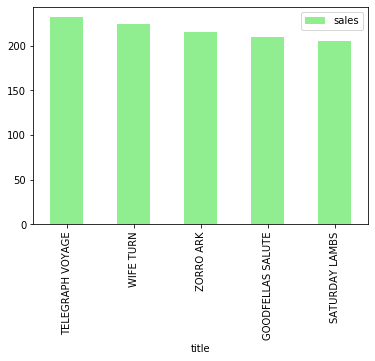

In [24]:
film.sort_values(by='sales', ascending=False).head(5)[['title','sales']].plot(kind='bar', x='title', color='lightgreen')

<Figure size 864x432 with 0 Axes>

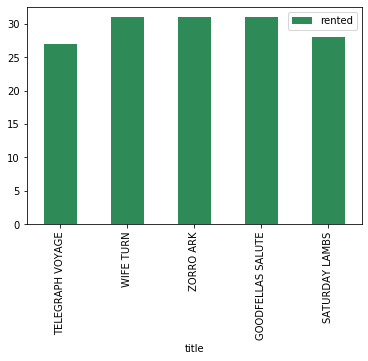

In [25]:
plt.figure(figsize=(12,6))
film.sort_values(by='sales', ascending=False).head(5)[['title','rented']].plot(kind='bar', x='title', color='seagreen')

Didapatkan bahwa film dengan judul TELEGRAPH VOYAGE, WIFE TURN, ZORRO ARK, GOODFELLAS SALUTE dan SATURDAY LAMBS memiliki nilai sewa yang terbanyak. Kategori yang dimiliki oleh kelima film ini juga berbeda-beda sehingga tidak dapat digeneralisasi bahwa film dengan kategori tertentu menarik untuk disewa oleh konsumen.

Kemudian berikut ini adalah film yang belum/tidak memiliki hasil sewa sampai data ini diambil.

In [26]:
film[film['sales']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 14 to 955
Data columns (total 12 columns):
title               42 non-null object
description         42 non-null object
rental_duration     42 non-null int64
rental_rate         42 non-null float64
length              42 non-null int64
replacement_cost    42 non-null float64
rating              42 non-null object
special_features    42 non-null object
category            42 non-null object
sales               42 non-null float64
rented              42 non-null int64
price_per_day       42 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 4.3+ KB


Terdapat 42 film yang belum pernah disewa oleh konsumen. Selanjutnya staff toko dapat lebih mempromosikan film-film berikut ini agar dapat menarik perhatian daripada konsumen, ataupun dapat dilakukan penelusuran kenapa film tersebut belum diminati oleh konsumen. Hal tersebut dapat disebabkan oleh beberapa hal, bisa jadi letak film tersebut sulit dijangkau oleh konsumen di dalam toko atau hal lain yang menyebabkan informasi mengenai film tersebut tidak mudah didapatkan.

### Top 5 Sales Film Groupby Category  

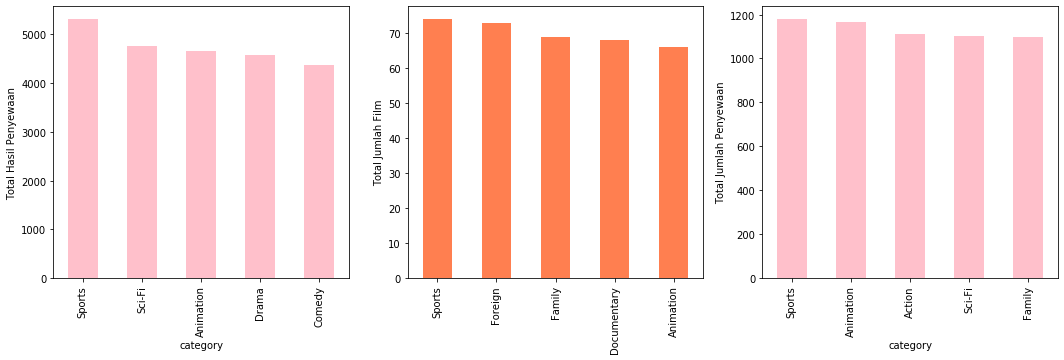

In [27]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.ylabel('Total Hasil Penyewaan')
film.groupby(by='category').sum().sort_values(by='sales',ascending=False)['sales'].head(5).plot(kind='bar', color='pink')
plt.subplot(1,3,2)
plt.ylabel('Total Jumlah Film')
film.category.value_counts()[:5].plot(kind='bar', color='coral')
plt.subplot(1,3,3)
plt.ylabel('Total Jumlah Penyewaan')
film.groupby(by='category').sum().sort_values(by='rented',ascending=False)['rented'].head(5).plot(kind='bar', color='pink')

Dari hasil grafik diatas bisa ditarik kesimpulan bahwa film dengan kategori sport, sci-fi, animation, drama dan comedy menghasilkan nilai sewa yang terbanyak, namun berbeda dengan jumlah penyewaan terbanyak terdapat film dengan kategori sport, animation, action, scifi dan family yang lebih menarik perhatian konsumen. Terdapat 2 kategori yang berbeda yaitu drama dan komedi pada top 5 sales (hasil penyewaan), action dan family pada top 5 film dengan jumlah sewa paling banyak. Hal ini menunjukan bahwa film dengan kategori drama dan komedi memiliki nilai rata-rata sewa yang lebih besar  daripada film dengan kategori action dan family. Hal lain yang dapat diperhatikan adalah Film dengan 3 nilai hasil sewa terbesar tidak termasuk dalam total 5 total film terbanyak berdasarkan kategori yaitu sci-fi, drama dan comedy.

In [28]:
film.groupby('category').mean()['rental_rate'].sort_values(ascending=False)

category
Games          3.252295
Travel         3.235614
Sci-Fi         3.219508
Comedy         3.162414
Sports         3.125135
New            3.116984
Foreign        3.099589
Horror         3.025714
Drama          3.022258
Music          2.950784
Children       2.890000
Animation      2.808182
Family         2.758116
Classics       2.744386
Documentary    2.666471
Action         2.646250
Name: rental_rate, dtype: float64

Dalam hal ini pemilik toko dapat memiliki 2 pilihan untuk meningkatkan penyewaan yaitu dengan menaikkan sedikit harga sewa untuk film dengan kategori action dan family (dengan tetap menjaga minat pelanggan terhadap film dengan kategori tersebut) atau dengan menambahkan jumlah koleksi film drama dan comedy.

### Top 5 Most Rented Film

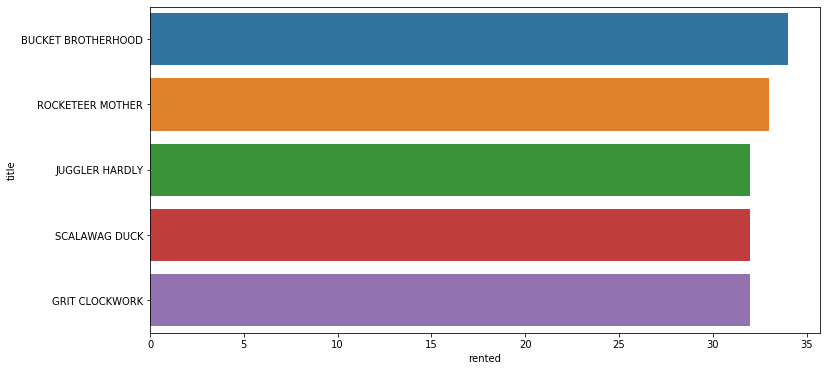

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(data = film.sort_values(by='rented', ascending=False)[:5], x='rented', y='title')

Plot diatas merupakan film-film yang banyak diminati pelanggan untuk disewa, terlihat bahwa film dengan judul Bucket Brotherhood dan Rocketeer Mother merupakan 2 film terbanyak disewa. Untuk mengambil keuntungan dari hasil ini pemiliki toko atau staff dapat menambah lebih banyak copy agar kesempatan bagi pelanggan untuk menyewa film lebih besar dan keuntungan yang didapatkan juga lebih besar. Selain dapat juga dengan menaikkan harga sewa untuk film yang paling laris untuk memperoleh keuntungan lebih dari film tersebut.

## Expensive Film Rental Rate per Day 

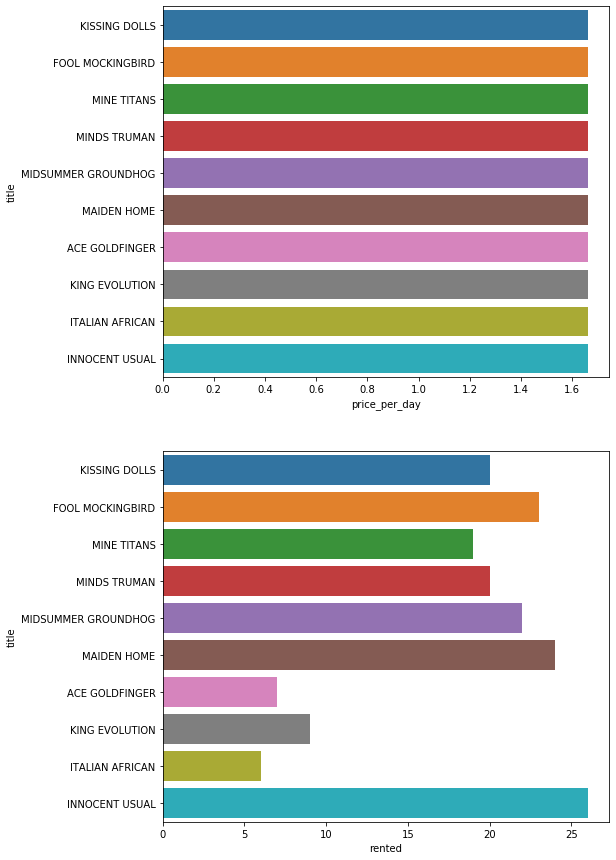

In [30]:
plt.figure(figsize=(8,15))
plt.subplot(2,1,1)
sns.barplot(data = film.sort_values(by='price_per_day', ascending=False)[:10], x='price_per_day', y='title')
plt.subplot(2,1,2)
sns.barplot(data = film.sort_values(by='price_per_day', ascending=False)[:10], x='rented', y='title')

Plot diatas merupakan 10 film dengan nilai sewa perhari tentinggi disertai dengan jumlah sewa yang dimiliki oleh masing-masing film. Dapat dilihat terdapat 3 film yang memiliki nilai sewa tinggi sedangkan jumlah sewa yang dihasilkan dibawah 10 kali. Insight yang didapat dari plot adalah pemilik toko dapat menurunkan sedikit nilai sewa agar lebih terjangkau oleh pelanggan dan meningkatkan minat pelanggan terhadap film tersebut.

## Film Duration and Rented 

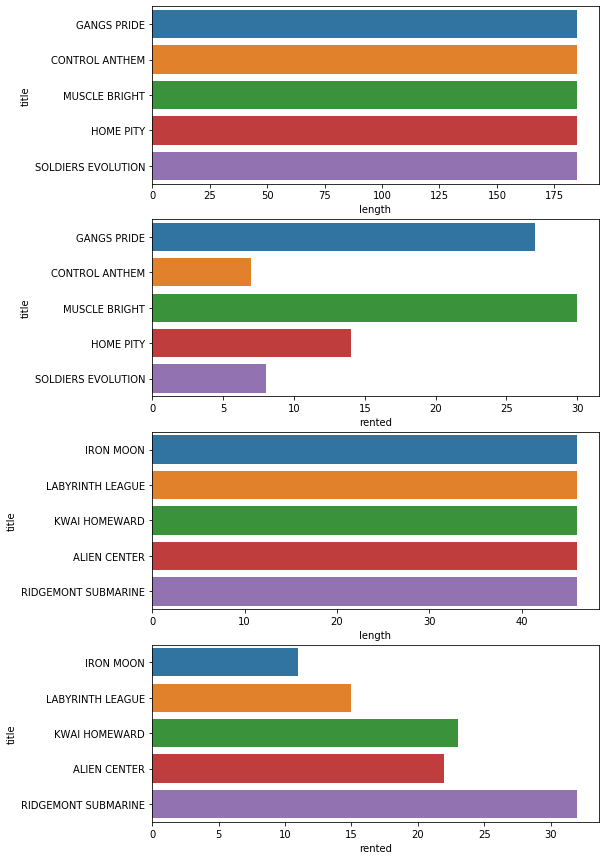

In [45]:
plt.figure(figsize=(8,15))
plt.subplot(4,1,1)
sns.barplot(data = film.sort_values(by='length', ascending=False)[:5], x='length', y='title')
plt.subplot(4,1,2)
sns.barplot(data = film.sort_values(by='length', ascending=False)[:5], x='rented', y='title')
plt.subplot(4,1,3)
sns.barplot(data = film.sort_values(by='length')[:5], x='length', y='title')
plt.subplot(4,1,4)
sns.barplot(data = film.sort_values(by='length')[:5], x='rented', y='title')

Plot diatas merupakan perbandingan antara film dengan durasi terpanjang dan terpendek beserta dengan jumlah sewa dari film-film tersebut. Dari plot diatas tidak dapat dipastikan bahwa pelanggan lebih berminat terhadap film dengan durasi panjang ataupun pendek.

## Aktor dengan Performance Terbanyak 

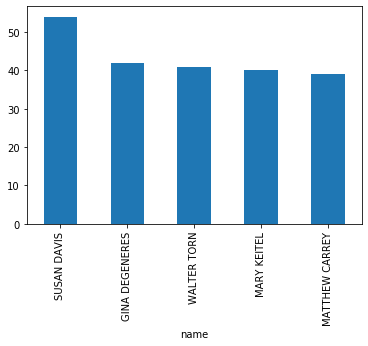

In [32]:
performance.sort_values('title', ascending=False)[:5]['title'].plot(kind='bar')

Plot diatas menunjukan bahwa terdapat 5 aktor yang memiliki jumlah performa terbanyak yaitu Susan Davis, Gina Degerares, Walter Torn, Mary Keitel dan Matthew Carrey. Untuk mendapatkan insigh yang lebih dalam kita akan lihat nilai penyewaan yang dihasilkan oleh film-film yang diperankan oleh aktor tersebut.

In [33]:
most_performance = ['SUSAN DAVIS', 'GINA DEGENERES', 'WALTER TORN', 'MARY KEITEL', 'MATTHEW CARREY']

list_film = []
for item in most_performance:
    for i in actor[actor['name']==item].film_id.values:
        list_film.append([item, film.loc[i]['title'], film.loc[i]['sales'], film.loc[i]['rented']])

Top_5_Actor = pd.DataFrame(columns=['actor','title','sales','rented'],data=list_film)
    

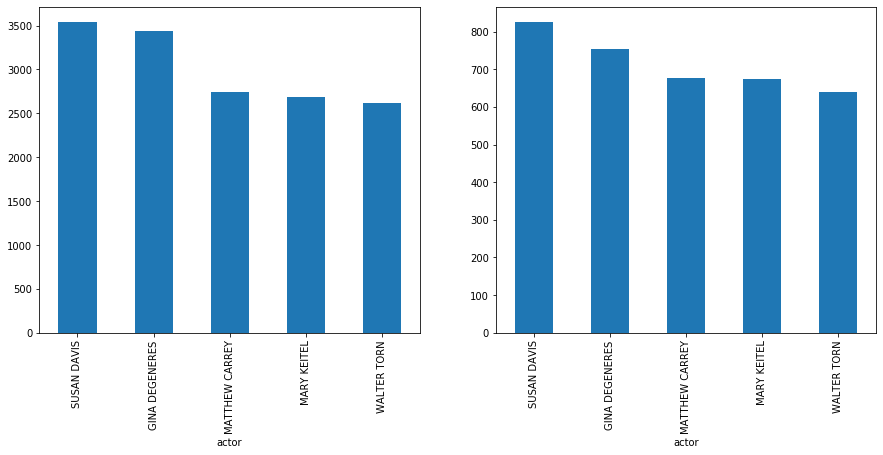

In [34]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
Top_5_Actor.groupby('actor').sum()['sales'].sort_values(ascending=False).plot(kind='bar')
plt.subplot(1,2,2)
Top_5_Actor.groupby('actor').sum()['rented'].sort_values(ascending=False).plot(kind='bar')

Dapat dilihat dari plot diatas bahwa film dengan aktor-aktor paling banyak performanya di dalam film juga cukup banyak diminati oleh pelanggan dan juga menghasilkan nilai hasil sewa yang besar. Insight yang didapat dari data ini adalah pemilik toko atau staff dapat meningkatkan penjualan dengan menambahkan koleksi film dengan aktor-aktor tersubut, terutama aktor dengan nama `Matthew Carrey` dimana meskipun memiliki urutan ke-5 untuk performasi tapi mencapai urutan ketiga dalam nilai hasil sewa dan termasuk urutan ketiga yang diminati pelanggan (untuk top 5 performa).

# Statistika : Uji Statistik dan Korelasi 

In [35]:
# Uji Normalitas Nilai Hasil Sewa (sales)

from scipy.stats import shapiro

norm, pval = shapiro(film['sales'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUS NORMAL')


Tolak H0 Karena P-Value (5.454752552230295e-17 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


In [36]:
# Uji Normalitas Banyaknya Sewa (rented)

from scipy.stats import shapiro

norm, pval = shapiro(film['rented'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUS NORMAL')


Tolak H0 Karena P-Value (1.4380324842022674e-07 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


Dari hasil statistik tes diatas diketahui bahwa nilai hasil sewa (sales) dan nilai jumlah sewa (rented) tidak terdistribusi normal. Hal ini mengarahkan pada uji Kruskal Walls yang akan digunakan selanjutnya untuk menguji nilai sewa berdasarkan kategori, rating dan rental_rate.

In [37]:
# Uji Perbandingan Nilai Hasil Sewa berdasarkan 5 Kategori Film terbanyak (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    film[film['category'] == 'Sports']['sales'],
    film[film['category'] == 'Foreign']['sales'],
    film[film['category'] == 'Documentary']['sales'],
    film[film['category'] == 'Family']['sales'],
    film[film['category'] == 'Animation']['sales']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus} < 5%)')
    print ('Terdapat Perbedaan Nilai Hasil Sewa pada Setiap film dengan kategori yang ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Hasil Sewa pada Setiap film dengan kategori yang ada')

Gagal Tolak H0 Karena P-Value (0.07372590090201608 > 5%)
Tidak Terdapat Perbedaan Nilai Hasil Sewa pada Setiap film dengan kategori yang ada


Hasil uji kruskal Wall pada nilai hasil sewa untuk 5 kategori dengan jumlah film terbanyak menunjukan bahwa tidak terdapat perbedaan. Ini menunjukan bahwa kategori tertentu tidak berpengaruh banyak terhadap nilai hasil sewa.

In [38]:
# Uji Perbandingan Banyaknya Sewa berdasarkan 5 Kategori Film terbanyak (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    film[film['rating'] == 'PG-13']['rented'],
    film[film['rating'] == 'NC-17']['rented'],
    film[film['rating'] == 'R']['rented'],
    film[film['rating'] == 'PG']['rented'],
    film[film['rating'] == 'G']['rented']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus} < 5%)')
    print ('Terdapat Perbedaan Jumlah Sewa pada Setiap film dengan Rating yang ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus} > 5%)')
    print ('Tidak Terdapat Perbedaan Jumlah Sewa pada Setiap film dengan Rating yang ada')

Gagal Tolak H0 Karena P-Value (0.4507682055542722 > 5%)
Tidak Terdapat Perbedaan Jumlah Sewa pada Setiap film dengan Rating yang ada


Hasil uji kruskal Wall pada banyaknya sewa untuk 5 jenis rating film menunjukan bahwa tidak terdapat perbedaan. Ini menunjukan bahwa reting tertentu tidak berpengaruh banyak terhadap nilai hasil sewa.

In [39]:
# Uji Perbandingan Nilai Hasil Sewa berdasarkan Rental_Rate (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    film[film['rental_rate'] == 0.99]['sales'],
    film[film['rental_rate'] == 2.99]['sales'],
    film[film['rental_rate'] == 4.99]['sales']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus} < 5%)')
    print ('Terdapat Perbedaan Nilai Hasil Sewa pada Setiap film dengan Harga sewa tertentu')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Hasil Sewa pada Setiap film dengan Harga sewa tertentu')

Tolak H0 Karena P-Value (6.670075118432135e-71 < 5%)
Terdapat Perbedaan Nilai Hasil Sewa pada Setiap film dengan Harga sewa tertentu


Dari hasil uji Kruskal Wall terhadap nilai hasil sewa berdasarkan rental_rate menunjukan adanya pengaruh besar rental rate terhadap nilai hasil sewa. Hal ini juga ditujukan oleh heatmap berikut dibawah, dimana korelasi antara rental_rate dan sales adalah 56%.

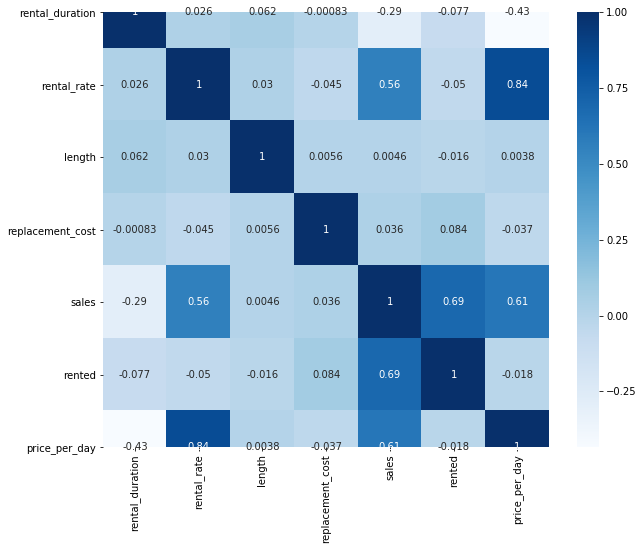

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(film.corr(), cmap='Blues', annot=True)